In [ ]:
# Make the kaggle.json file readable by the Kaggle API.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle.
!kaggle datasets download -d vivekattri/california-wildfire-damage-2014-feb2025

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vivekattri/california-wildfire-damage-2014-feb2025
License(s): MIT
  0% 0.00/2.96k [00:00<?, ?B/s]
100% 2.96k/2.96k [00:00<00:00, 5.83MB/s]


In [ ]:
!unzip california-wildfire-damage-2014-feb2025.zip

Archive:  california-wildfire-damage-2014-feb2025.zip
  inflating: California Wildfire Damage.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
# Example: Read the 'covid_19_data.csv' file into a pandas DataFrame
df = pd.read_csv('/content/california-wildfire-damage-2014-feb2025.zip')

# Print some info about the DataFrame (optional)
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [ ]:
df_business = df[['Incident_ID','Businesses_Destroyed','Homes_Destroyed','Vehicles_Damaged','Estimated_Financial_Loss (Million $)']]
df_business.head()

,Incident_ID,Businesses_Destroyed,Homes_Destroyed,Vehicles_Damaged,Estimated_Financial_Loss (Million $)
0,INC1000,474,763,235,2270.57
1,INC1001,4,1633,263,1381.14
2,INC1002,291,915,31,2421.96
3,INC1003,128,1220,34,3964.16
4,INC1004,469,794,147,1800.09


In [ ]:
df_human = df[['Incident_ID','Injuries','Fatalities']]
df_human.head()

,Incident_ID,Injuries,Fatalities
0,INC1000,70,19
1,INC1001,100,2
2,INC1002,50,6
3,INC1003,28,0
4,INC1004,0,15


In [ ]:
df_oreginal = df[['Incident_ID','Date','Location','Area_Burned (Acres)','Cause']]
df_oreginal.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Cause
0,INC1000,2020-11-22,Sonoma County,14048,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,Lightning
2,INC1002,2022-02-10,Shasta County,26394,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,Unknown


In [ ]:

df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' column to datetime objects
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df[['Date', 'Year', 'Month', 'Day']].head()) # Print the new columns



        Date  Year  Month  Day
0 2020-11-22  2020     11   22
1 2021-09-23  2021      9   23
2 2022-02-10  2022      2   10
3 2021-05-17  2021      5   17
4 2021-09-22  2021      9   22


In [ ]:
# Define a function to categorize seasons accurately
def assign_season(row):
    month = row['Month']
    day = row['Day']

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create the 'Season' column
df['Season'] = df.apply(assign_season, axis=1)

# Display the first few rows with the new column
print(df[['Date', 'Month', 'Day', 'Season']].head())

        Date  Month  Day  Season
0 2020-11-22     11   22    Fall
1 2021-09-23      9   23    Fall
2 2022-02-10      2   10  Winter
3 2021-05-17      5   17  Spring
4 2021-09-22      9   22  Summer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Incident_ID                           100 non-null    object        
 1   Date                                  100 non-null    datetime64[ns]
 2   Location                              100 non-null    object        
 3   Area_Burned (Acres)                   100 non-null    int64         
 4   Homes_Destroyed                       100 non-null    int64         
 5   Businesses_Destroyed                  100 non-null    int64         
 6   Vehicles_Damaged                      100 non-null    int64         
 7   Injuries                              100 non-null    int64         
 8   Fatalities                            100 non-null    int64         
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 10  Cau

In [ ]:
df.describe()

,Date,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Year,Month,Day
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,2019-02-26 07:26:24,26531.460000,941.890000,251.570000,150.330000,42.040000,9.930000,2396.099300,2018.640000,6.680000,16.5800
min,2014-02-03 00:00:00,357.000000,18.000000,4.000000,5.000000,0.000000,0.000000,52.590000,2014.000000,1.000000,1.0000
25%,2016-05-06 06:00:00,15916.250000,501.000000,134.750000,70.750000,16.000000,5.000000,1175.195000,2016.000000,4.000000,10.0000
50%,2019-04-02 00:00:00,25618.000000,908.500000,256.500000,150.500000,37.000000,10.000000,2408.530000,2019.000000,7.000000,16.5000
75%,2021-10-06 00:00:00,39775.000000,1401.750000,371.000000,229.750000,60.000000,14.250000,3662.110000,2021.000000,9.250000,23.0000
max,2023-12-08 00:00:00,49653.000000,1968.000000,493.000000,300.000000,100.000000,20.000000,4866.990000,2023.000000,12.000000,30.0000
std,NaN,14282.123824,543.019967,138.317761,88.471197,29.201467,5.682251,1430.439422,3.036878,3.215744,8.2354


In [ ]:
df.isna().sum()

,0
Incident_ID,0
Date,0
Location,0
Area_Burned (Acres),0
Homes_Destroyed,0
Businesses_Destroyed,0
Vehicles_Damaged,0
Injuries,0
Fatalities,0
Estimated_Financial_Loss (Million $),0


In [ ]:
df['Incident_ID'].duplicated().sum()

0

# Location

In [ ]:
df['Location'].unique()

array(['Sonoma County', 'Shasta County', 'Butte County',
       'San Diego County', 'Napa Valley', 'Riverside County',
       'Santa Barbara County', 'Los Angeles County', 'Mendocino County',
       'Orange County'], dtype=object)

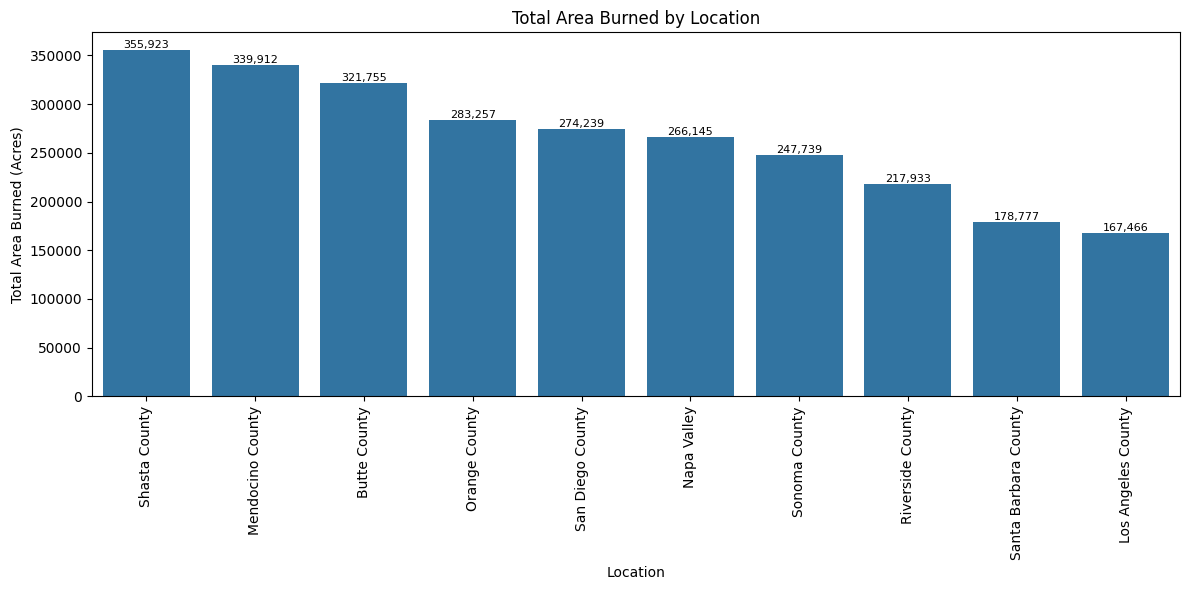

In [ ]:


# Group by location and sum the area burned
location_area = df.groupby('Location')['Area_Burned (Acres)'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_area.index, y=location_area.values)
plt.xlabel("Location")
plt.ylabel("Total Area Burned (Acres)")
plt.title("Total Area Burned by Location")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the bars with the sum of areas
for i, v in enumerate(location_area.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


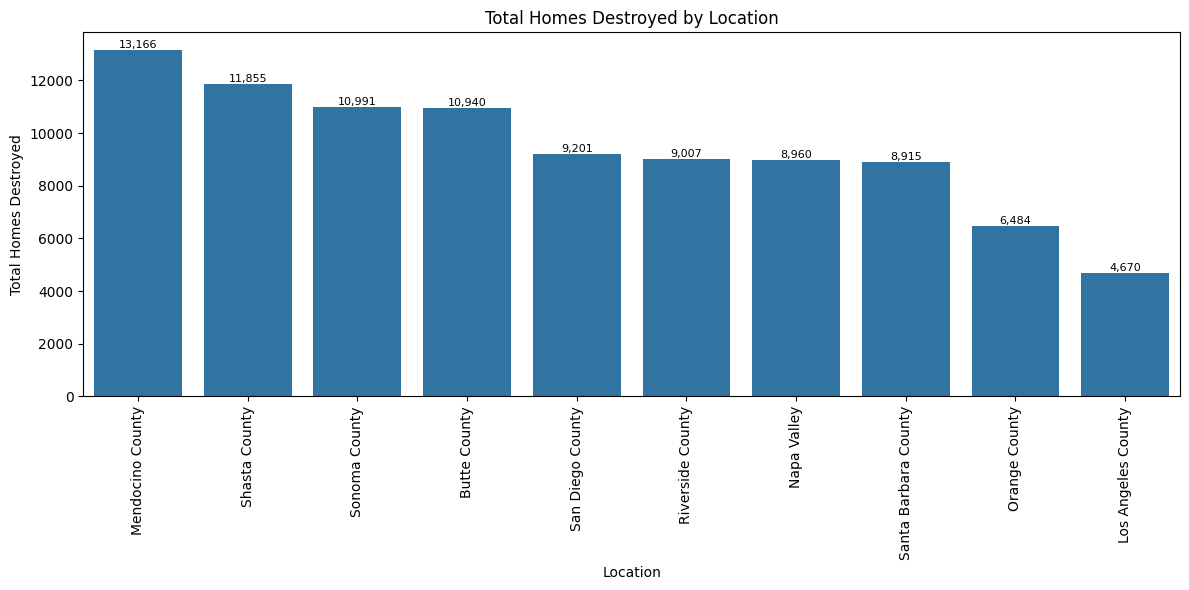

In [ ]:

# Group by location and sum the number of homes destroyed
location_homes = df.groupby('Location')['Homes_Destroyed'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_homes.index, y=location_homes.values)
plt.xlabel("Location")
plt.ylabel("Total Homes Destroyed")
plt.title("Total Homes Destroyed by Location")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the bars with the sum of homes destroyed
for i, v in enumerate(location_homes.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


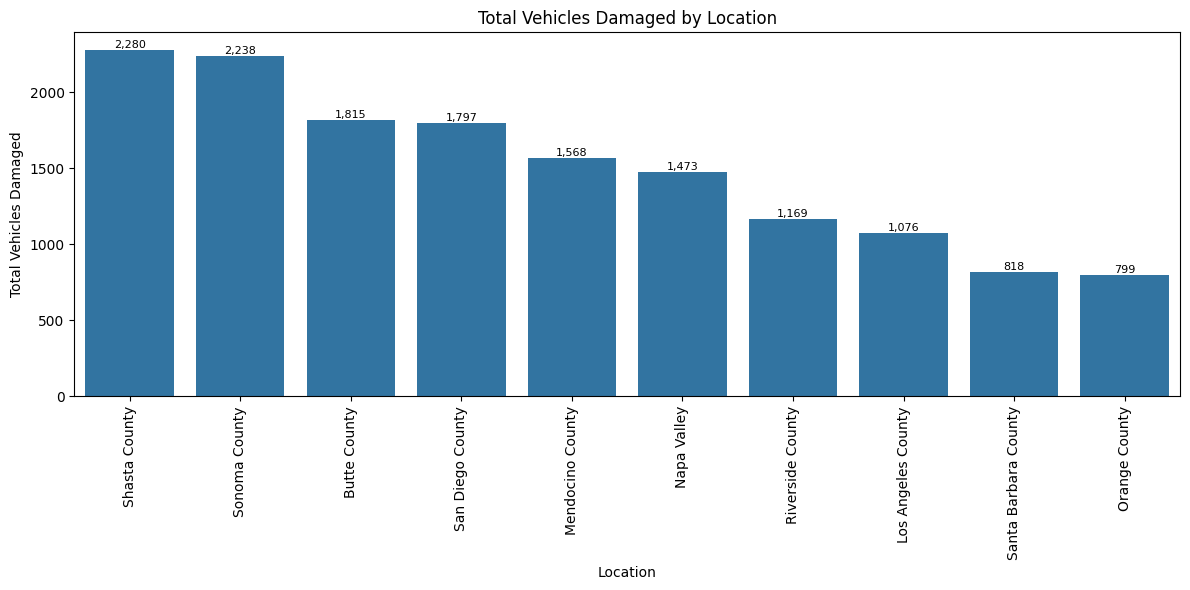

In [ ]:
# Group by location and sum the number of vehicles damaged
location_vehicles = df.groupby('Location')['Vehicles_Damaged'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_vehicles.index, y=location_vehicles.values)
plt.xlabel("Location")
plt.ylabel("Total Vehicles Damaged")
plt.title("Total Vehicles Damaged by Location")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the bars with the sum of vehicles damaged
for i, v in enumerate(location_vehicles.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


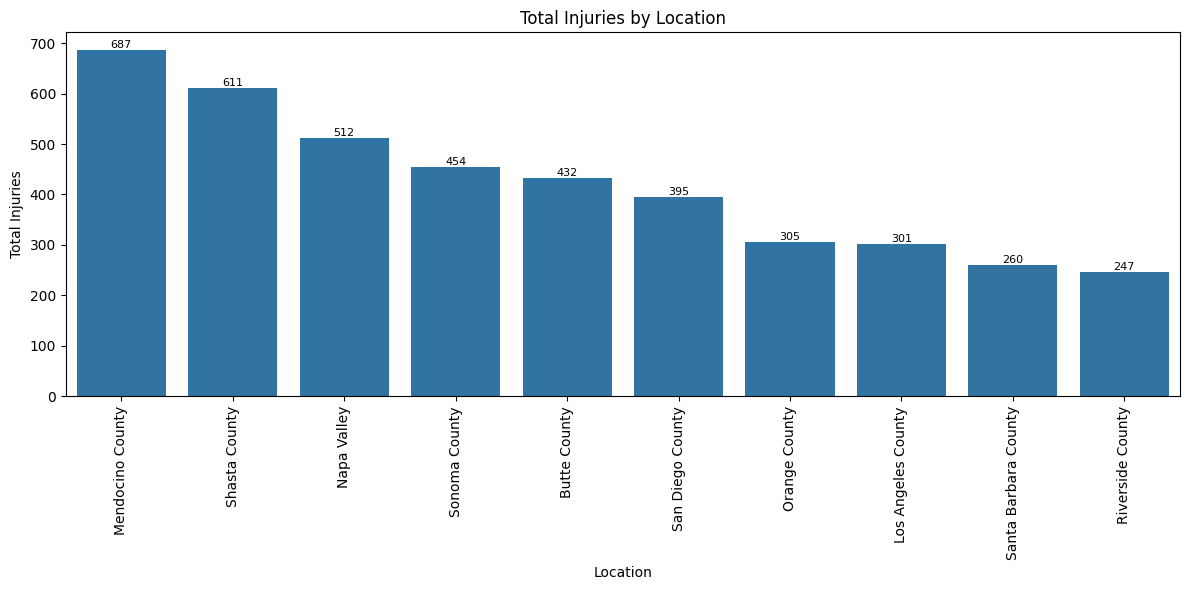

In [ ]:


# Group by location and sum injuries
location_injuries = df.groupby('Location')['Injuries'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_injuries.index, y=location_injuries.values)
plt.xlabel("Location")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Location")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the bars with the sum of injuries
for i, v in enumerate(location_injuries.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


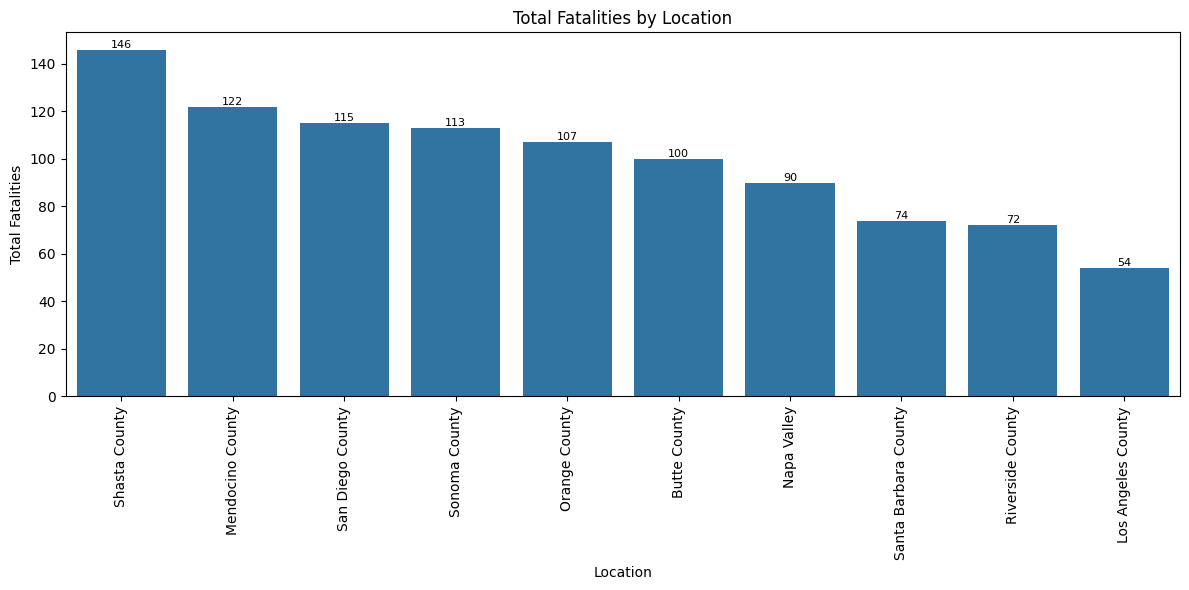

In [ ]:
# Group by location and sum fatalities
location_fatalities = df.groupby('Location')['Fatalities'].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_fatalities.index, y=location_fatalities.values)
plt.xlabel("Location")
plt.ylabel("Total Fatalities")
plt.title("Total Fatalities by Location")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the bars with the sum of fatalities
for i, v in enumerate(location_fatalities.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


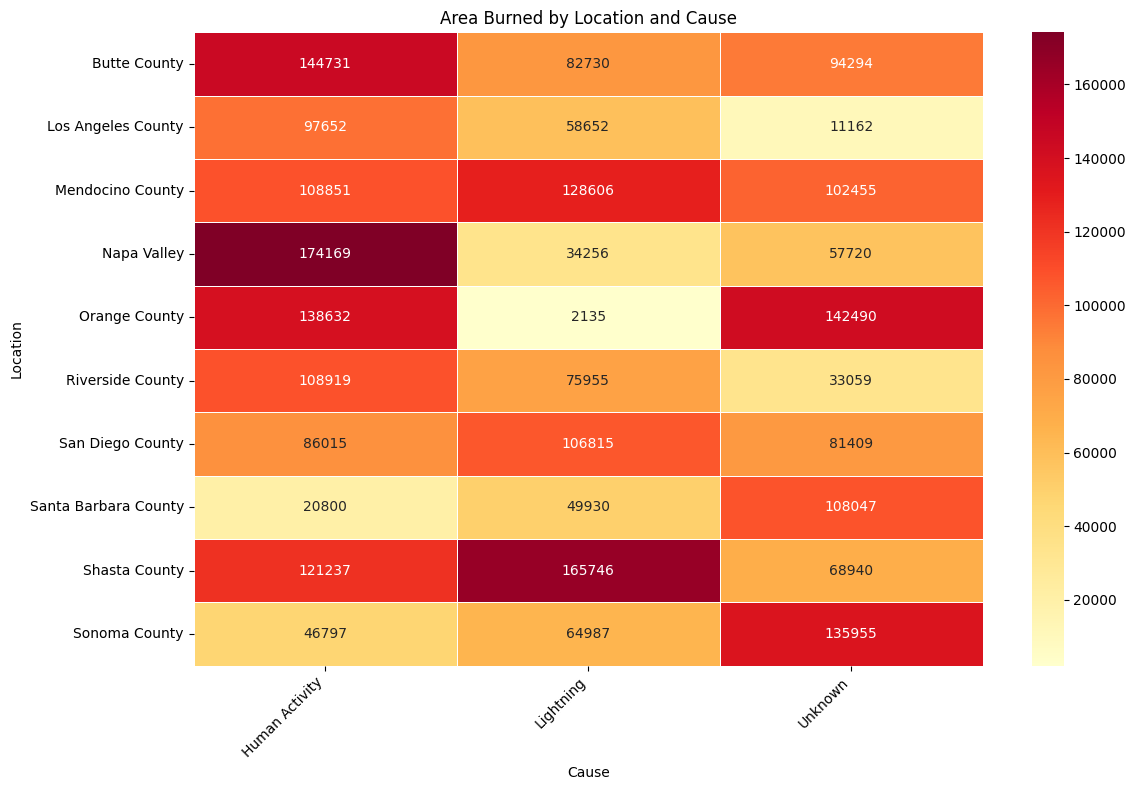

In [ ]:
# Create a pivot table to aggregate data for the heatmap
heatmap_data = df.pivot_table(index='Location', columns='Cause', values='Area_Burned (Acres)', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Area Burned by Location and Cause")
plt.xlabel("Cause")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Group the data by location and year, summing the area burned
location_area_over_time = df.groupby(['Location', 'Year'])['Area_Burned (Acres)'].sum().reset_index()

# Create the Plotly line plot
fig = px.line(location_area_over_time,
              x='Year',
              y='Area_Burned (Acres)',
              color='Location',
              title='Area Burned (Acres) Over Time by Location',
              labels={'Area_Burned (Acres)': 'Area Burned (Acres)', 'Year': 'Year', 'Location': 'Location'},
              markers=True
             )

fig.show()


# Human

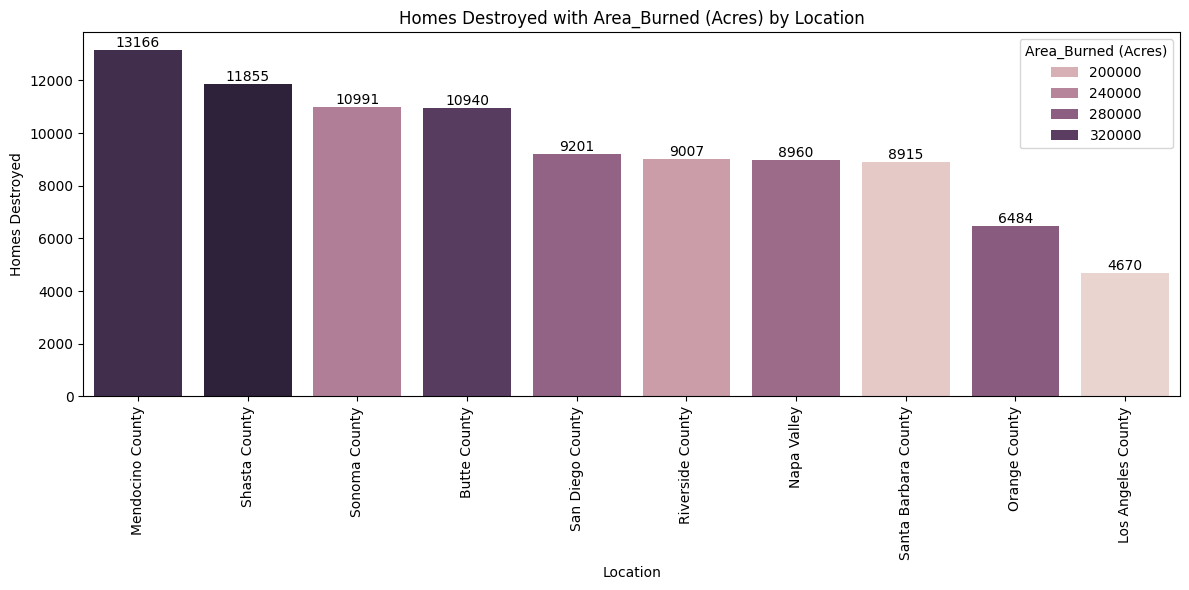

In [ ]:
# Group data by location and sum Homes_Destroyed and Area_Burned (Acres)
location_data = df.groupby('Location').agg({'Homes_Destroyed': 'sum', 'Area_Burned (Acres)': 'sum'}).sort_values(ascending = False,by = 'Homes_Destroyed').reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Homes_Destroyed', hue='Area_Burned (Acres)', data=location_data)
plt.xlabel("Location")
plt.ylabel("Homes Destroyed")
plt.title("Homes Destroyed with Area_Burned (Acres) by Location")
plt.xticks(rotation=90)

# Annotate the bars
for index, row in location_data.iterrows():
    plt.text(index, row['Homes_Destroyed'], f"{row['Homes_Destroyed']}", ha='center', va='bottom')


plt.tight_layout()
plt.show()


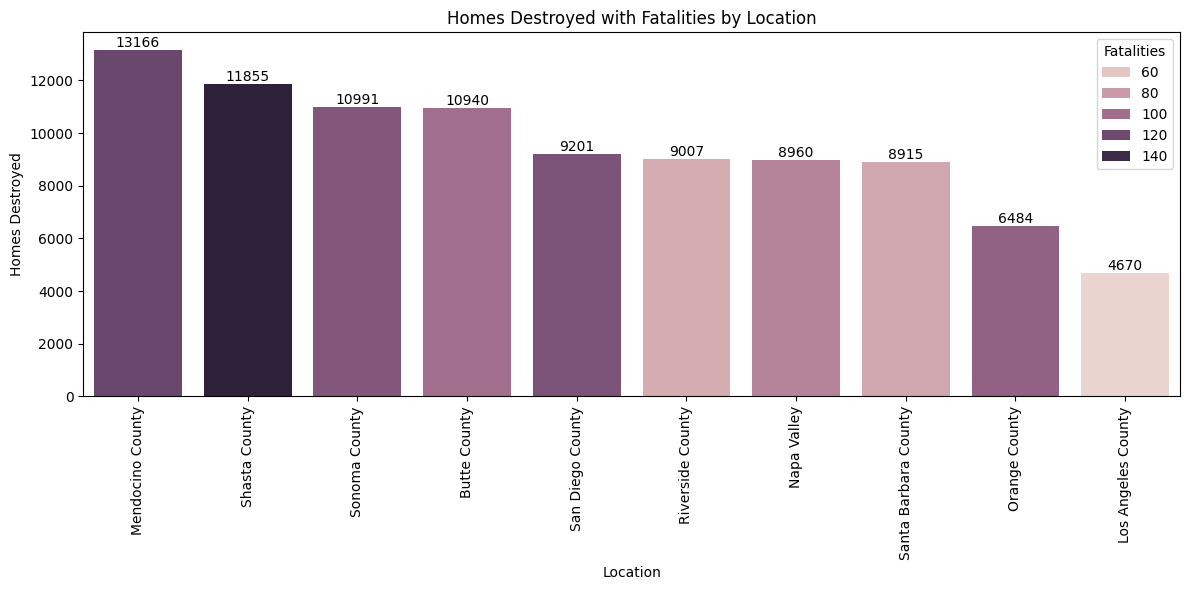

In [ ]:
# Group data by location and sum Homes_Destroyed and Fatalities
location_data = df.groupby('Location').agg({'Homes_Destroyed': 'sum', 'Fatalities': 'sum'}).sort_values(ascending = False,by = 'Homes_Destroyed').reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Homes_Destroyed', hue='Fatalities', data=location_data)
plt.xlabel("Location")
plt.ylabel("Homes Destroyed")
plt.title("Homes Destroyed with Fatalities by Location")
plt.xticks(rotation=90)

# Annotate the bars
for index, row in location_data.iterrows():
    plt.text(index, row['Homes_Destroyed'], f"{row['Homes_Destroyed']}", ha='center', va='bottom')


plt.tight_layout()
plt.show()


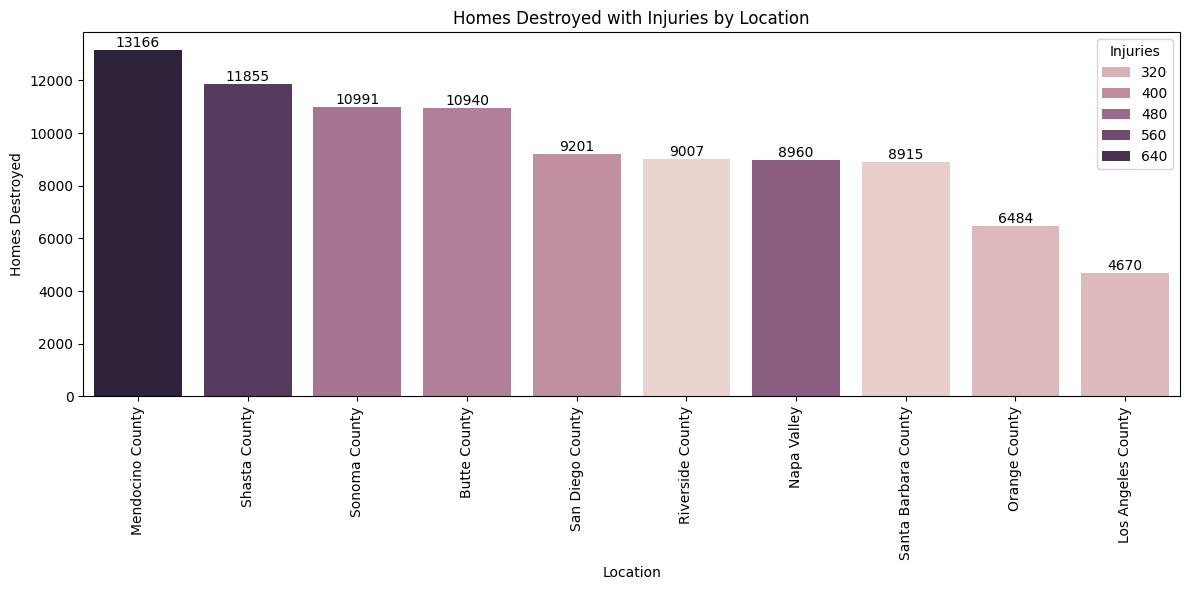

In [ ]:
# Group data by location and sum Homes_Destroyed and Injuries
location_data = df.groupby('Location').agg({'Homes_Destroyed': 'sum', 'Injuries': 'sum'}).sort_values(ascending = False,by = 'Homes_Destroyed').reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Homes_Destroyed', hue='Injuries', data=location_data)
plt.xlabel("Location")
plt.ylabel("Homes Destroyed")
plt.title("Homes Destroyed with Injuries by Location")
plt.xticks(rotation=90)

# Annotate the bars
for index, row in location_data.iterrows():
    plt.text(index, row['Homes_Destroyed'], f"{row['Homes_Destroyed']}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


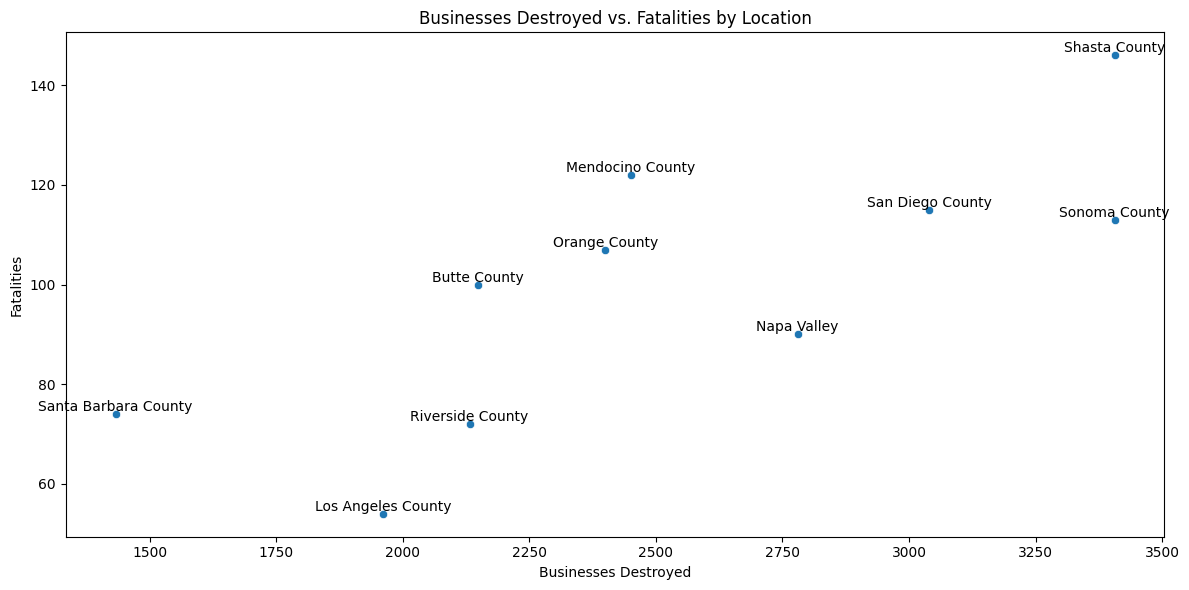

In [ ]:
# Group data by location and sum Businesses_Destroyed and Fatalities
location_data = df.groupby('Location').agg({'Businesses_Destroyed': 'sum', 'Fatalities': 'sum'}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Businesses_Destroyed', y='Fatalities', data=location_data, marker='o')
plt.xlabel("Businesses Destroyed")
plt.ylabel("Fatalities")
plt.title("Businesses Destroyed vs. Fatalities by Location")

# Annotate the points
for index, row in location_data.iterrows():
    plt.text(row['Businesses_Destroyed'], row['Fatalities'], f"{row['Location']}", ha='center', va='bottom')


plt.tight_layout()
plt.show()


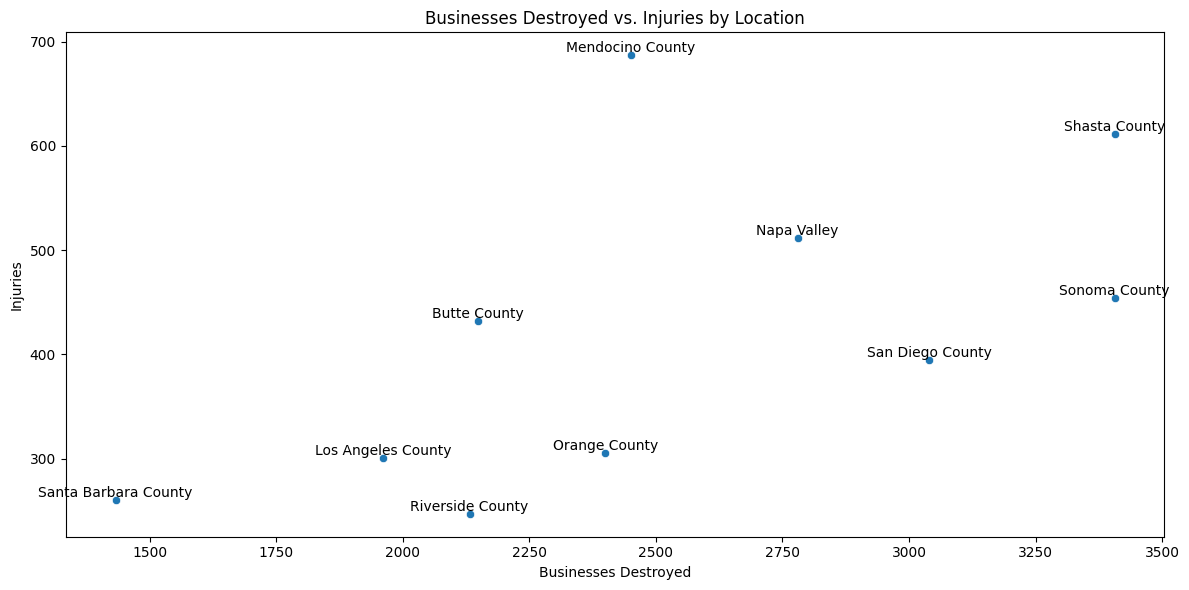

In [ ]:
# Group data by location and sum Businesses_Destroyed and Injuries
location_data = df.groupby('Location').agg({'Businesses_Destroyed': 'sum', 'Injuries': 'sum'}).reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Businesses_Destroyed', y='Injuries', data=location_data, marker='o')
plt.xlabel("Businesses Destroyed")
plt.ylabel("Injuries")
plt.title("Businesses Destroyed vs. Injuries by Location")

# Annotate the points
for index, row in location_data.iterrows():
    plt.text(row['Businesses_Destroyed'], row['Injuries'], f"{row['Location']}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


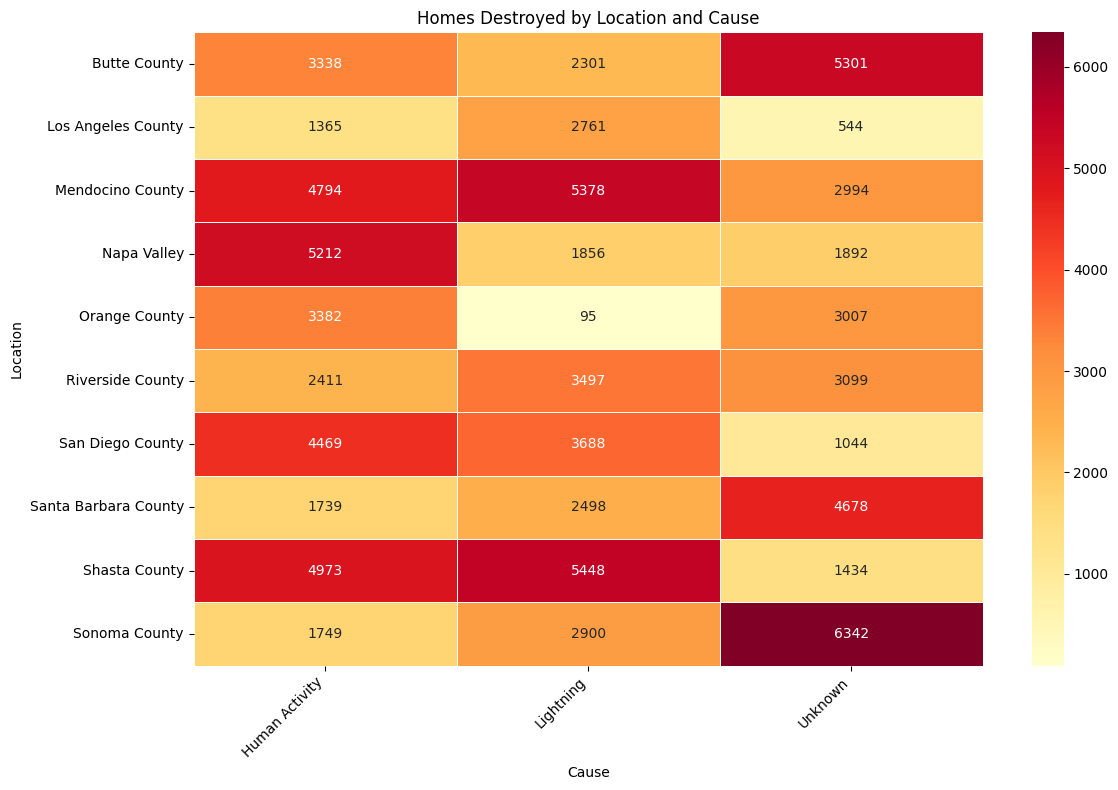

In [ ]:
# prompt: plot heat map Location with Cause in df values Homes_Destroyed

import matplotlib.pyplot as plt
# Create a pivot table to aggregate data for the heatmap
heatmap_data = df.pivot_table(index='Location', columns='Cause', values='Homes_Destroyed', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Homes Destroyed by Location and Cause")
plt.xlabel("Cause")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


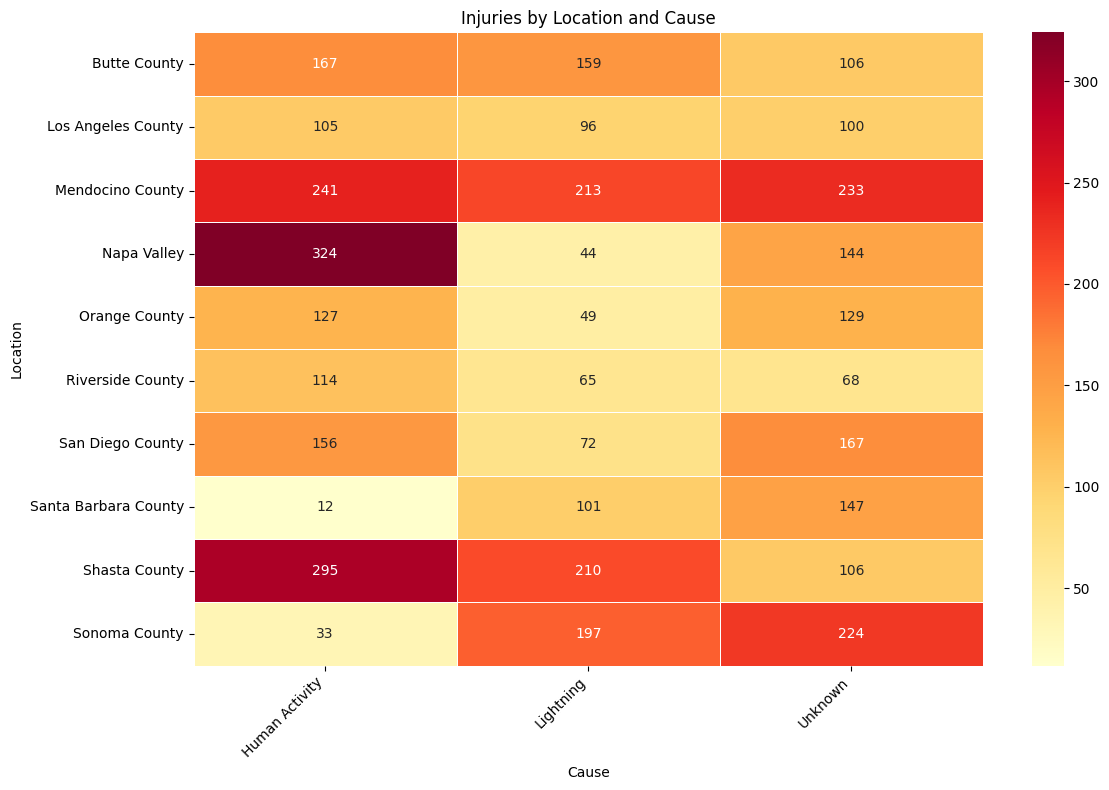

In [ ]:
# Create a pivot table to aggregate data for the heatmap
heatmap_data = df.pivot_table(index='Location', columns='Cause', values='Injuries', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Injuries by Location and Cause")
plt.xlabel("Cause")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


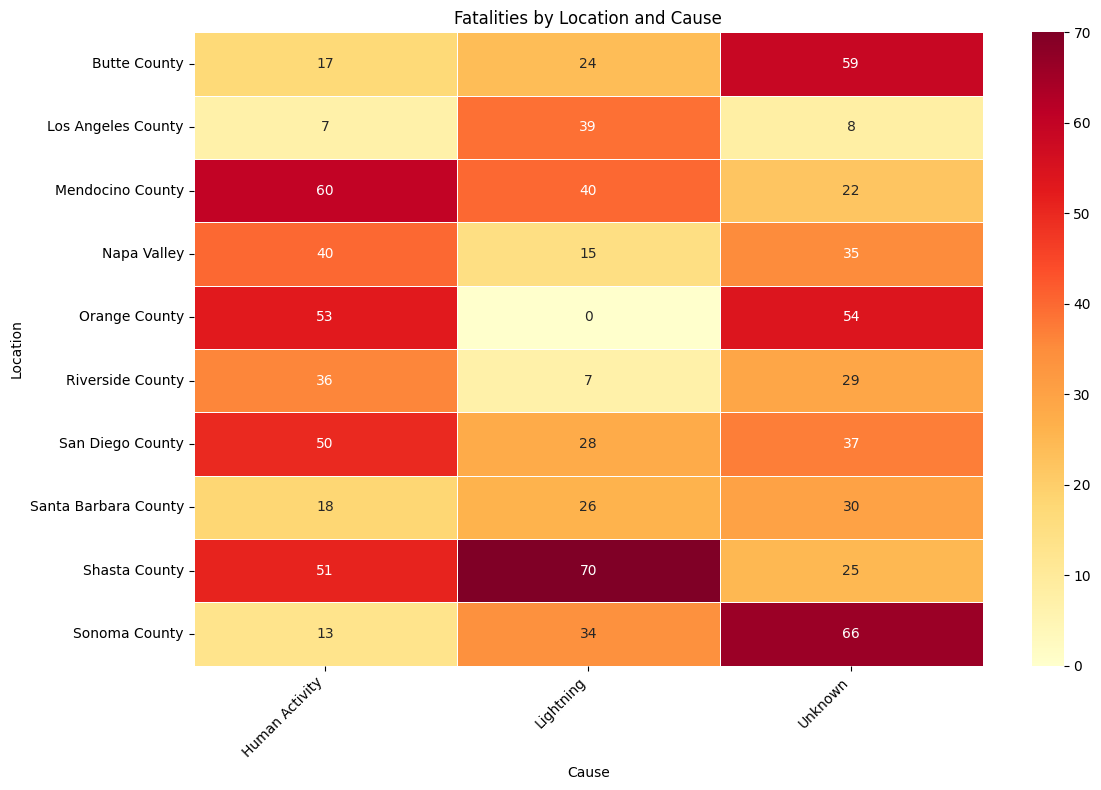

In [ ]:
# prompt: plot heat map Location with Cause in df values Fatalities

import matplotlib.pyplot as plt
# Create a pivot table to aggregate data for the heatmap
heatmap_data = df.pivot_table(index='Location', columns='Cause', values='Fatalities', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Fatalities by Location and Cause")
plt.xlabel("Cause")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Group the data by location and year, summing the number of homes destroyed
location_homes_over_time = df.groupby(['Location', 'Year'])['Homes_Destroyed'].sum().reset_index()

# Create the Plotly line plot
fig = px.line(location_homes_over_time,
              x='Year',
              y='Homes_Destroyed',
              color='Location',
              title='Homes Destroyed Over Time by Location',
              labels={'Homes_Destroyed': 'Homes Destroyed', 'Year': 'Year', 'Location': 'Location'},
              markers=True
             )

fig.show()


In [ ]:
# Group the data by location and year, summing the injuries
location_injuries_over_time = df.groupby(['Location', 'Year'])['Injuries'].sum().reset_index()

# Create the Plotly line plot
fig = px.line(location_injuries_over_time,
              x='Year',
              y='Injuries',
              color='Location',
              title='Injuries Over Time by Location',
              labels={'Injuries': 'Injuries', 'Year': 'Year', 'Location': 'Location'},
              markers=True
             )

fig.show()


In [ ]:
# Group the data by location and year, summing the fatalities
location_fatalities_over_time = df.groupby(['Location', 'Year'])['Fatalities'].sum().reset_index()

# Create the Plotly line plot
fig = px.line(location_fatalities_over_time,
              x='Year',
              y='Fatalities',
              color='Location',
              title='Fatalities Over Time by Location',
              labels={'Fatalities': 'Fatalities', 'Year': 'Year', 'Location': 'Location'},
              markers=True
             )

fig.show()


In [ ]:
df.columns


Index(['Incident_ID', 'Date', 'Location', 'Area_Burned (Acres)',
       'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged',
       'Injuries', 'Fatalities', 'Estimated_Financial_Loss (Million $)',
       'Cause', 'Year', 'Month', 'Day', 'Season'],
      dtype='object')

# Estimated_Financial_Loss

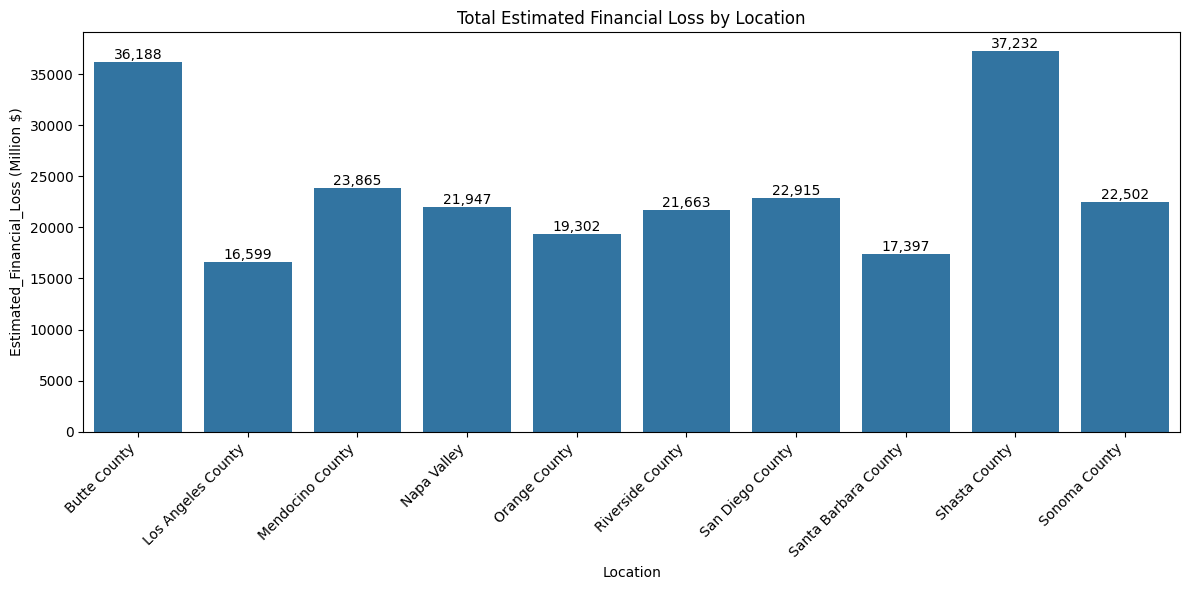

In [ ]:


# Group by location and sum Estimated_Financial_Loss
location_loss = df.groupby('Location')['Estimated_Financial_Loss (Million $)'].sum()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_loss.index, y=location_loss.values)
plt.xlabel('Location')
plt.ylabel('Estimated_Financial_Loss (Million $)')
plt.title('Total Estimated Financial Loss by Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add the sum value on top of each bar
for i, v in enumerate(location_loss.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


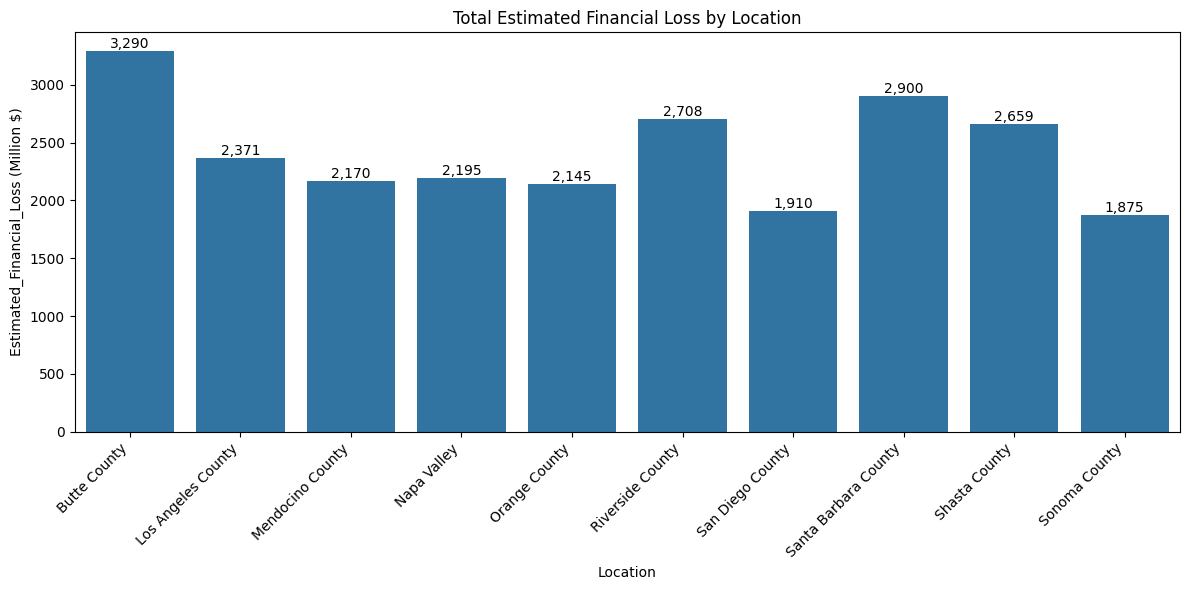

In [ ]:
# Group by location and mean Estimated_Financial_Loss
location_loss = df.groupby('Location')['Estimated_Financial_Loss (Million $)'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_loss.index, y=location_loss.values)
plt.xlabel('Location')
plt.ylabel('Estimated_Financial_Loss (Million $)')
plt.title('Total Estimated Financial Loss by Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add the sum value on top of each bar
for i, v in enumerate(location_loss.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


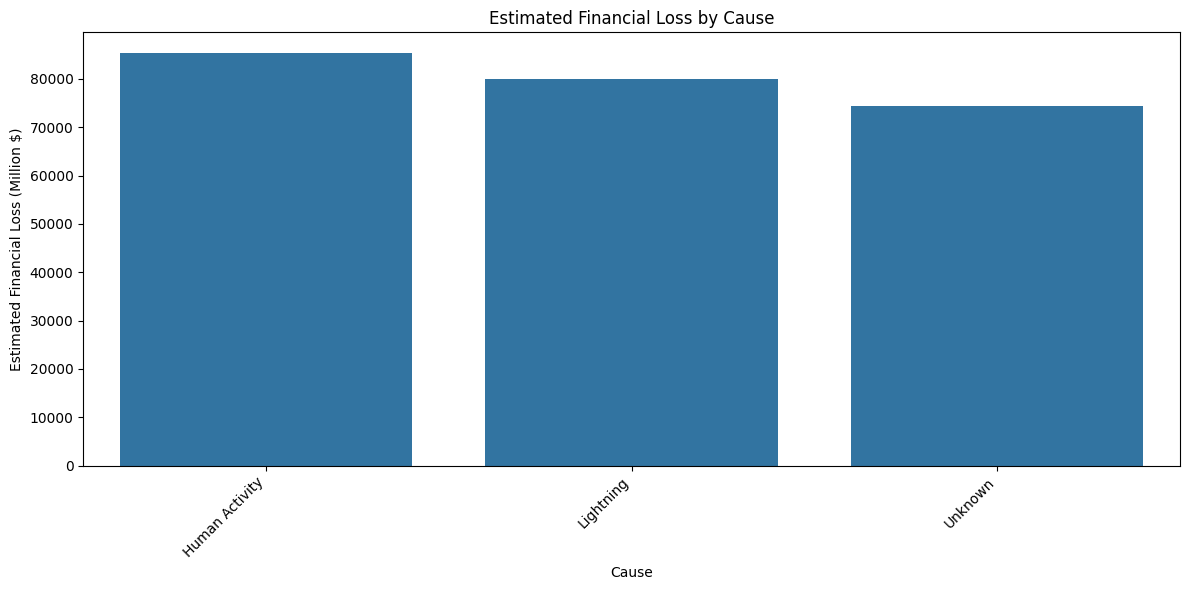

In [ ]:
# Group data by Cause and calculate the sum of Estimated_Financial_Loss
cause_loss = df.groupby('Cause')['Estimated_Financial_Loss (Million $)'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_loss.index, y=cause_loss.values)
plt.xlabel('Cause')
plt.ylabel('Estimated Financial Loss (Million $)')
plt.title('Estimated Financial Loss by Cause')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


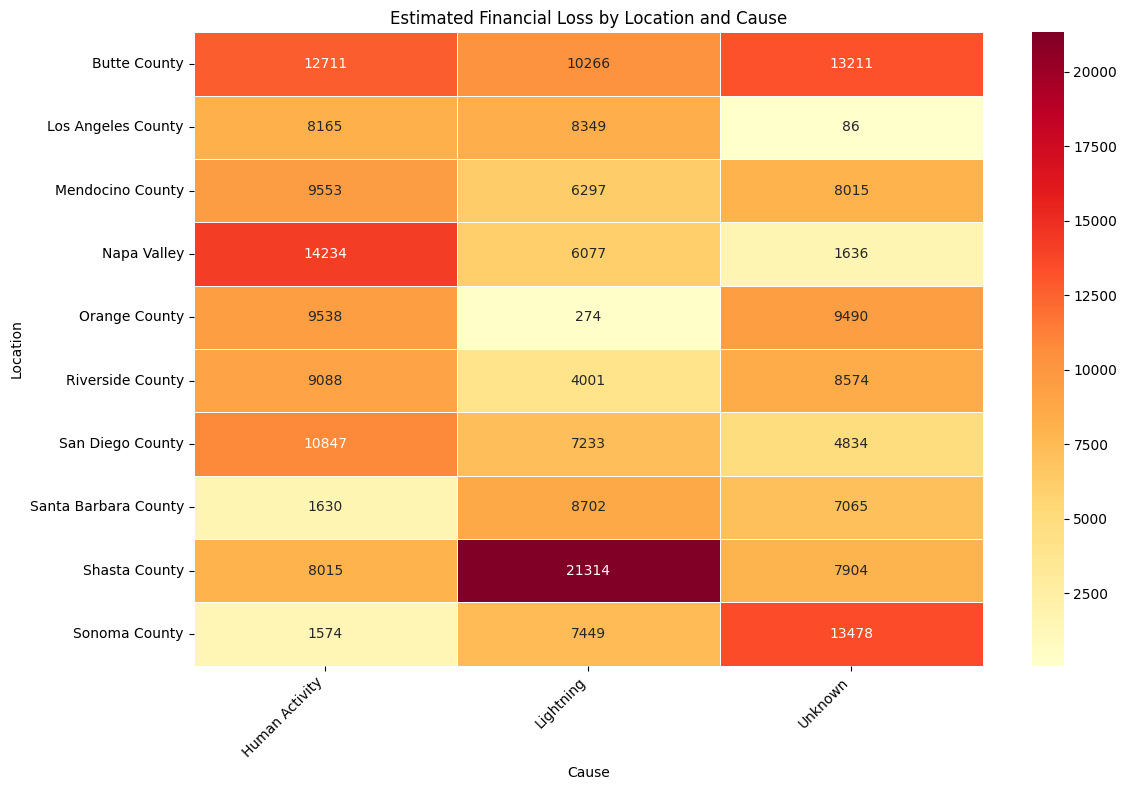

In [ ]:
# prompt: plot heat map Location with Cause in df values Estimated_Financial_Loss (Million $)

import matplotlib.pyplot as plt
# Create a pivot table to aggregate data for the heatmap
heatmap_data = df.pivot_table(index='Location', columns='Cause', values='Estimated_Financial_Loss (Million $)', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Estimated Financial Loss by Location and Cause")
plt.xlabel("Cause")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


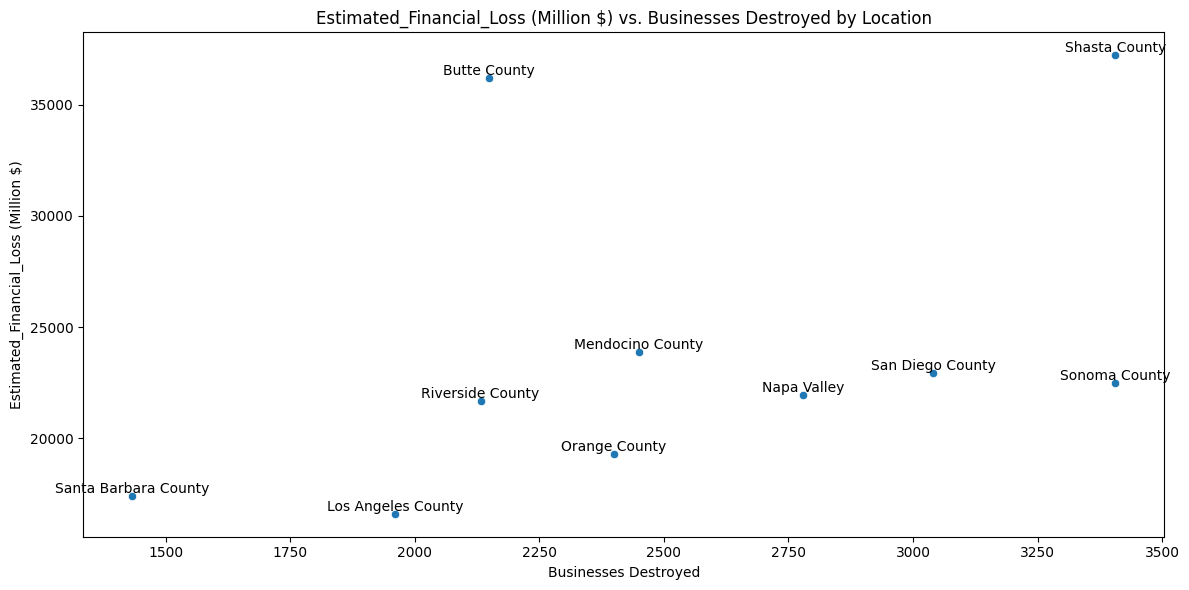

In [ ]:
# Group data by location and sum Estimated_Financial_Loss (Million $) and Businesses_Destroyed
location_data = df.groupby('Location').agg({'Estimated_Financial_Loss (Million $)': 'sum', 'Businesses_Destroyed': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Businesses_Destroyed', y='Estimated_Financial_Loss (Million $)', data=location_data)
plt.xlabel('Businesses Destroyed')
plt.ylabel('Estimated_Financial_Loss (Million $)')
plt.title('Estimated_Financial_Loss (Million $) vs. Businesses Destroyed by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Businesses_Destroyed'].iloc[i], location_data['Estimated_Financial_Loss (Million $)'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()

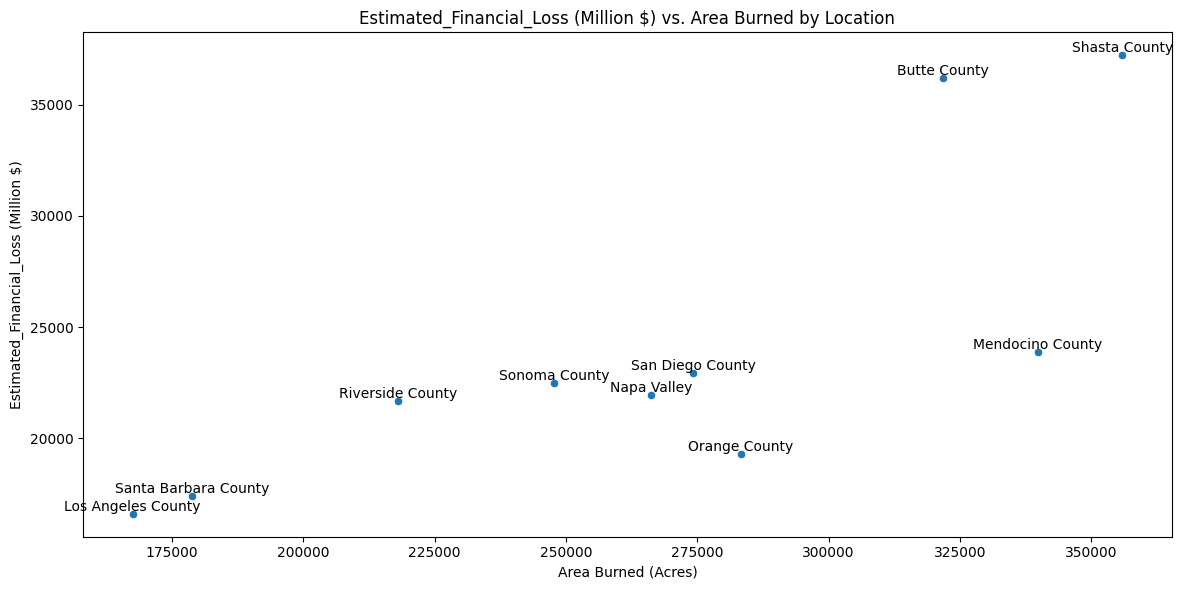

In [ ]:
# Group data by location and sum Estimated_Financial_Loss (Million $) and Area_Burned (Acres)
location_data = df.groupby('Location').agg({'Estimated_Financial_Loss (Million $)': 'sum', 'Area_Burned (Acres)': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area_Burned (Acres)', y='Estimated_Financial_Loss (Million $)', data=location_data)
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Estimated_Financial_Loss (Million $)')
plt.title('Estimated_Financial_Loss (Million $) vs. Area Burned by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Area_Burned (Acres)'].iloc[i], location_data['Estimated_Financial_Loss (Million $)'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()

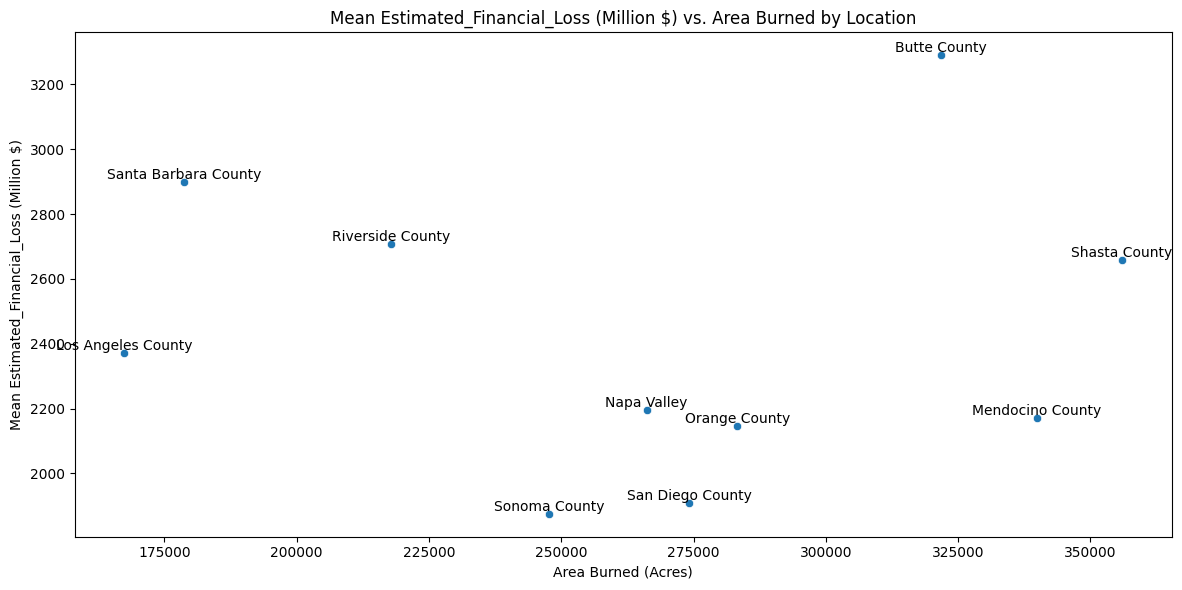

In [ ]:
# Group data by location and mean Estimated_Financial_Loss (Million $) and Area_Burned (Acres)
location_data = df.groupby('Location').agg({'Estimated_Financial_Loss (Million $)': 'mean', 'Area_Burned (Acres)': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area_Burned (Acres)', y='Estimated_Financial_Loss (Million $)', data=location_data)
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Mean Estimated_Financial_Loss (Million $)')
plt.title('Mean Estimated_Financial_Loss (Million $) vs. Area Burned by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Area_Burned (Acres)'].iloc[i], location_data['Estimated_Financial_Loss (Million $)'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()

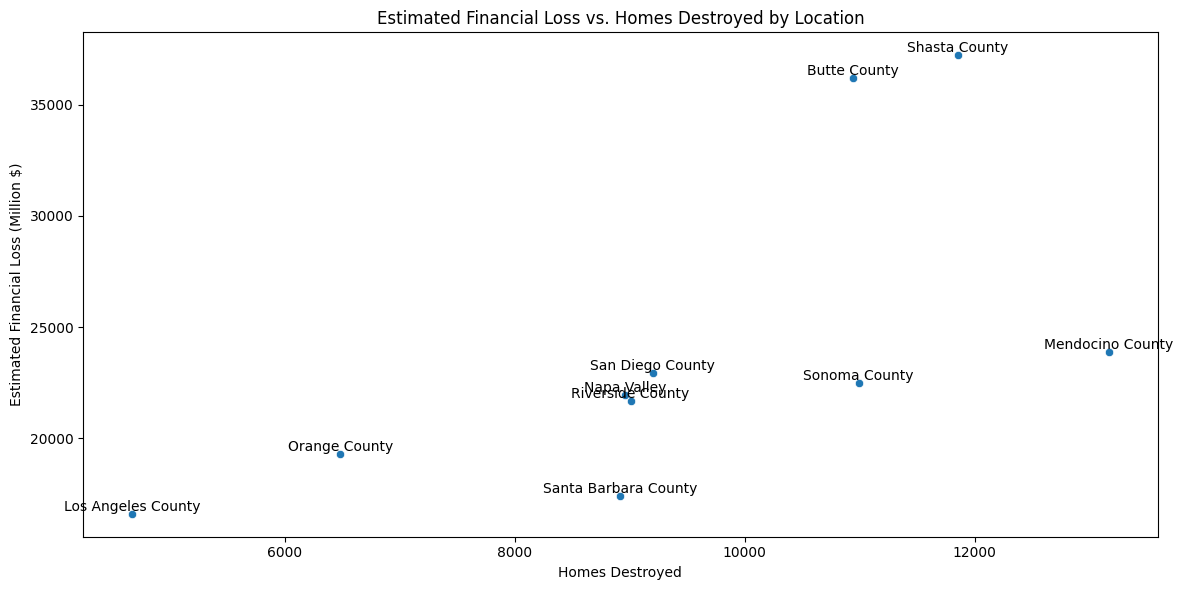

In [ ]:
# Group data by location and sum Estimated_Financial_Loss and Homes_Destroyed
location_data = df.groupby('Location').agg({'Estimated_Financial_Loss (Million $)': 'sum', 'Homes_Destroyed': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Homes_Destroyed', y='Estimated_Financial_Loss (Million $)', data=location_data)
plt.xlabel('Homes Destroyed')
plt.ylabel('Estimated Financial Loss (Million $)')
plt.title('Estimated Financial Loss vs. Homes Destroyed by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Homes_Destroyed'].iloc[i], location_data['Estimated_Financial_Loss (Million $)'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


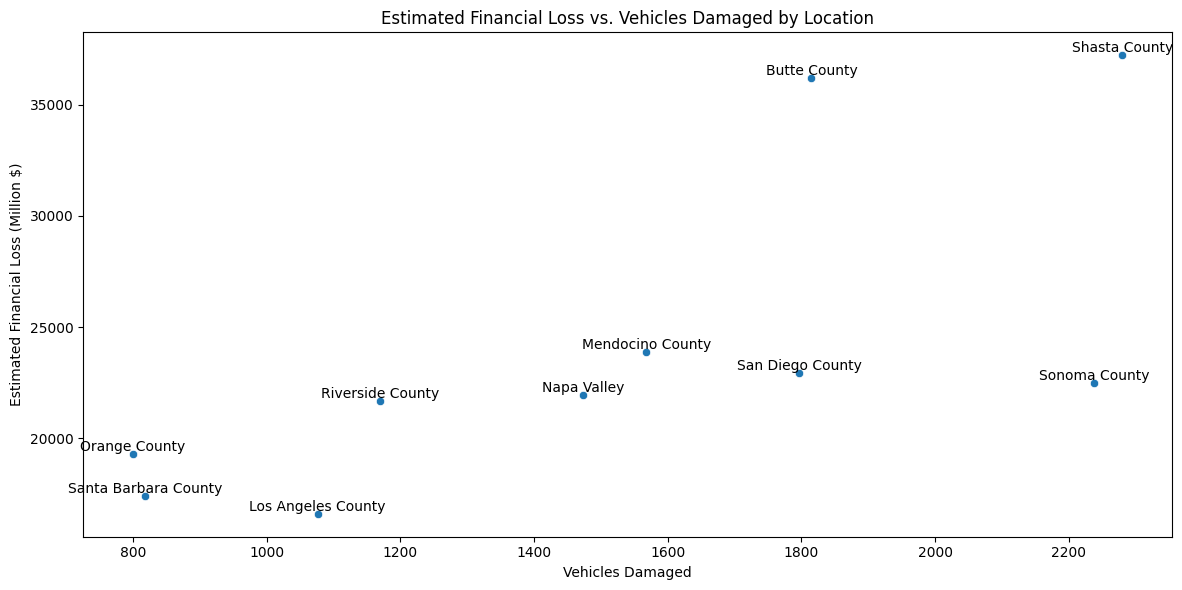

In [ ]:
# Group data by location and sum Estimated_Financial_Loss and Vehicles_Damaged
location_data = df.groupby('Location').agg({'Estimated_Financial_Loss (Million $)': 'sum', 'Vehicles_Damaged': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Vehicles_Damaged', y='Estimated_Financial_Loss (Million $)', data=location_data)
plt.xlabel('Vehicles Damaged')
plt.ylabel('Estimated Financial Loss (Million $)')
plt.title('Estimated Financial Loss vs. Vehicles Damaged by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Vehicles_Damaged'].iloc[i], location_data['Estimated_Financial_Loss (Million $)'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Group data by year and location, then sum the Estimated_Financial_Loss
grouped_data = df.groupby(['Year', 'Location'])['Estimated_Financial_Loss (Million $)'].sum().reset_index()

# Create the interactive bar chart using Plotly Express
fig = px.line(grouped_data,
             x='Year',
             y='Estimated_Financial_Loss (Million $)',
             color='Location',
             title='Estimated Financial Loss by Year and Location',
             labels={'Estimated_Financial_Loss (Million $)':'Estimated Financial Loss (Million $)',
                     'Year': 'Year',
                     'Location': 'Location'},
             hover_data=['Location', 'Year', 'Estimated_Financial_Loss (Million $)'])

fig.show()


In [ ]:


# Group data by Month and location, then sum the Estimated_Financial_Loss
grouped_data = df.groupby(['Month', 'Location'])['Estimated_Financial_Loss (Million $)'].sum().reset_index()

# Create the interactive bar chart using Plotly Express
fig = px.line(grouped_data,
             x='Month',
             y='Estimated_Financial_Loss (Million $)',
             color='Location',
             title='Estimated Financial Loss by Month and Location',
             labels={'Estimated_Financial_Loss (Million $)':'Estimated Financial Loss (Million $)',
                     'Month': 'Month',
                     'Location': 'Location'},
             hover_data=['Location', 'Month', 'Estimated_Financial_Loss (Million $)'])

fig.show()


# Businesses_Destroyed

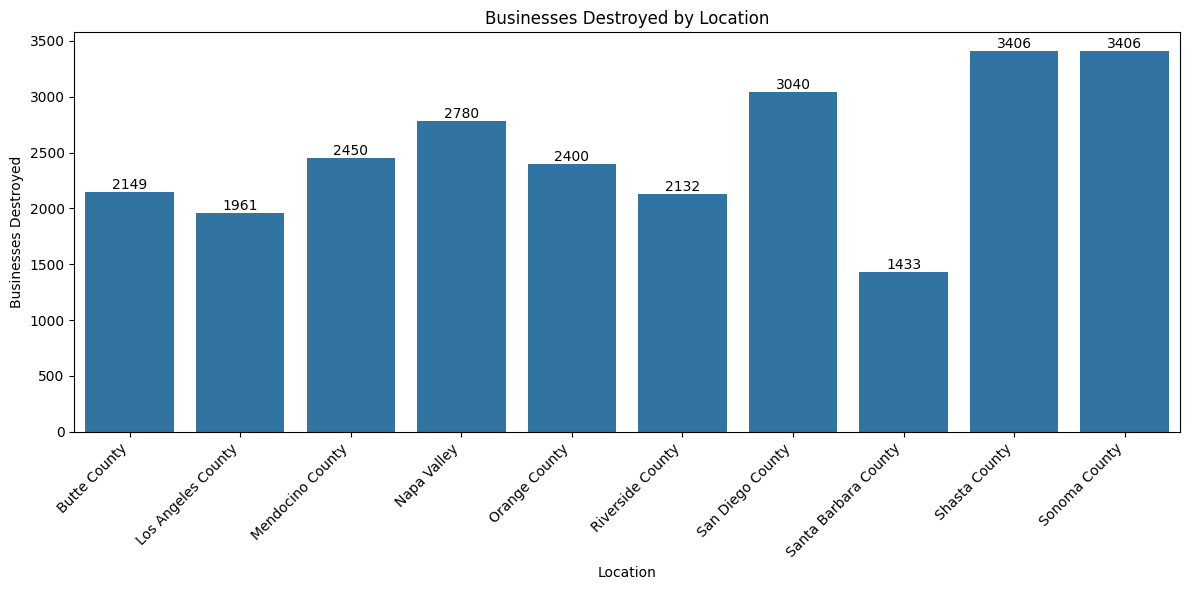

In [ ]:
# Group data by location and sum Businesses_Destroyed
location_destroyed = df.groupby('Location')['Businesses_Destroyed'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=location_destroyed.index, y=location_destroyed.values)
plt.xlabel('Location')
plt.ylabel('Businesses Destroyed')
plt.title('Businesses Destroyed by Location')
plt.xticks(rotation=45, ha='right')

# Add the count above each bar
for bar, value in zip(bars.patches, location_destroyed.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


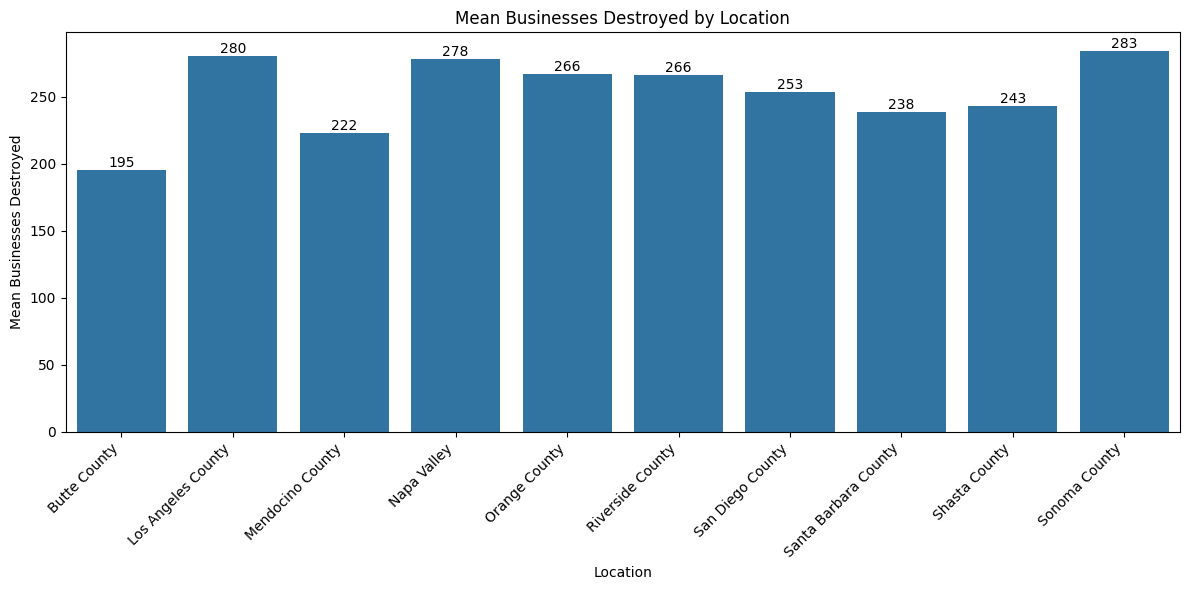

In [ ]:
# Group data by location and Mean Businesses_Destroyed
location_destroyed = df.groupby('Location')['Businesses_Destroyed'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=location_destroyed.index, y=location_destroyed.values)
plt.xlabel('Location')
plt.ylabel('Mean Businesses Destroyed')
plt.title('Mean Businesses Destroyed by Location')
plt.xticks(rotation=45, ha='right')

# Add the count above each bar
for bar, value in zip(bars.patches, location_destroyed.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


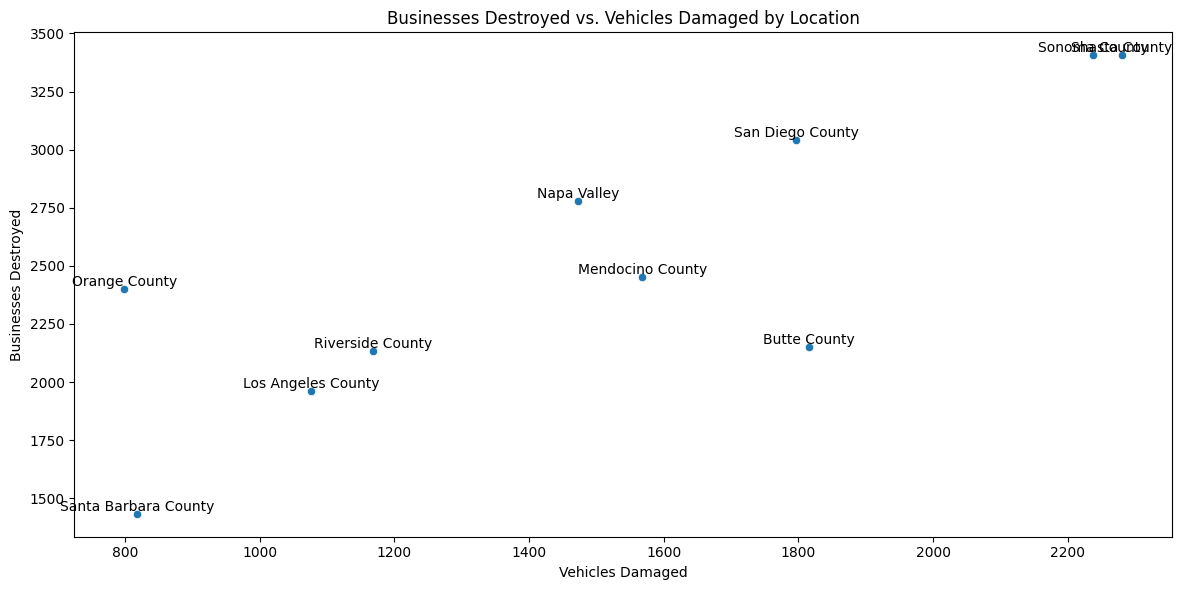

In [ ]:
# Group data by location and sum Businesses_Destroyed and Vehicles_Damaged
location_data = df.groupby('Location').agg({'Businesses_Destroyed': 'sum', 'Vehicles_Damaged': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Vehicles_Damaged', y='Businesses_Destroyed', data=location_data)
plt.xlabel('Vehicles Damaged')
plt.ylabel('Businesses Destroyed')
plt.title('Businesses Destroyed vs. Vehicles Damaged by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Vehicles_Damaged'].iloc[i], location_data['Businesses_Destroyed'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


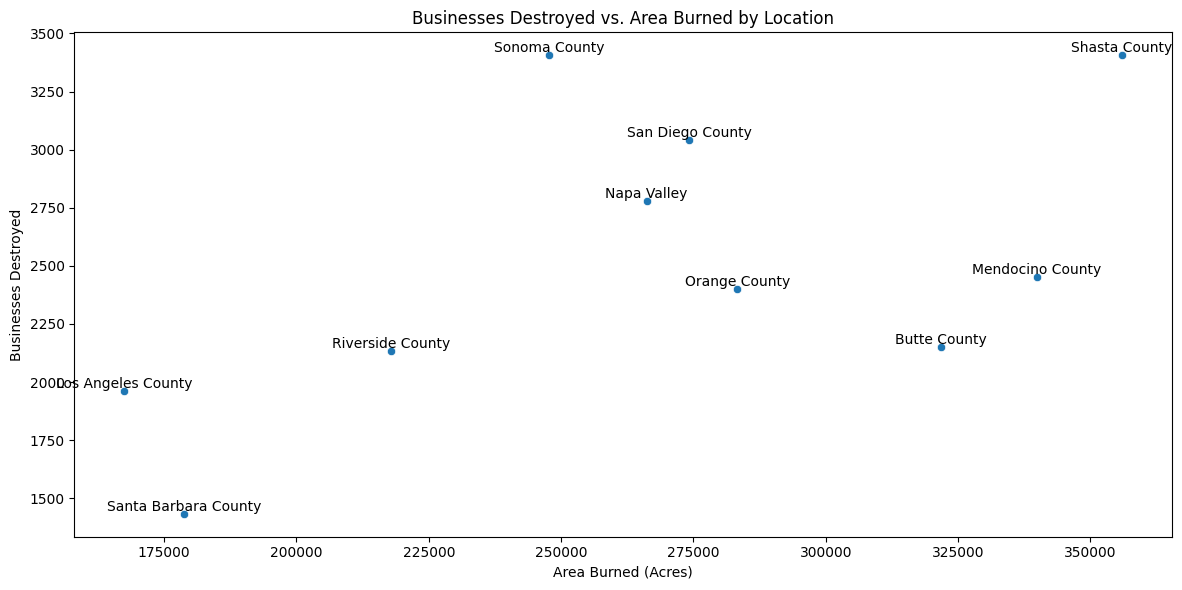

In [ ]:
# Group data by location and sum Businesses_Destroyed and Area_Burned (Acres)
location_data = df.groupby('Location').agg({'Businesses_Destroyed': 'sum', 'Area_Burned (Acres)': 'sum'})

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area_Burned (Acres)', y='Businesses_Destroyed', data=location_data)
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Businesses Destroyed')
plt.title('Businesses Destroyed vs. Area Burned by Location')

# Add labels for each point (location)
for i in range(len(location_data)):
    plt.text(location_data['Area_Burned (Acres)'].iloc[i], location_data['Businesses_Destroyed'].iloc[i],
             location_data.index[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


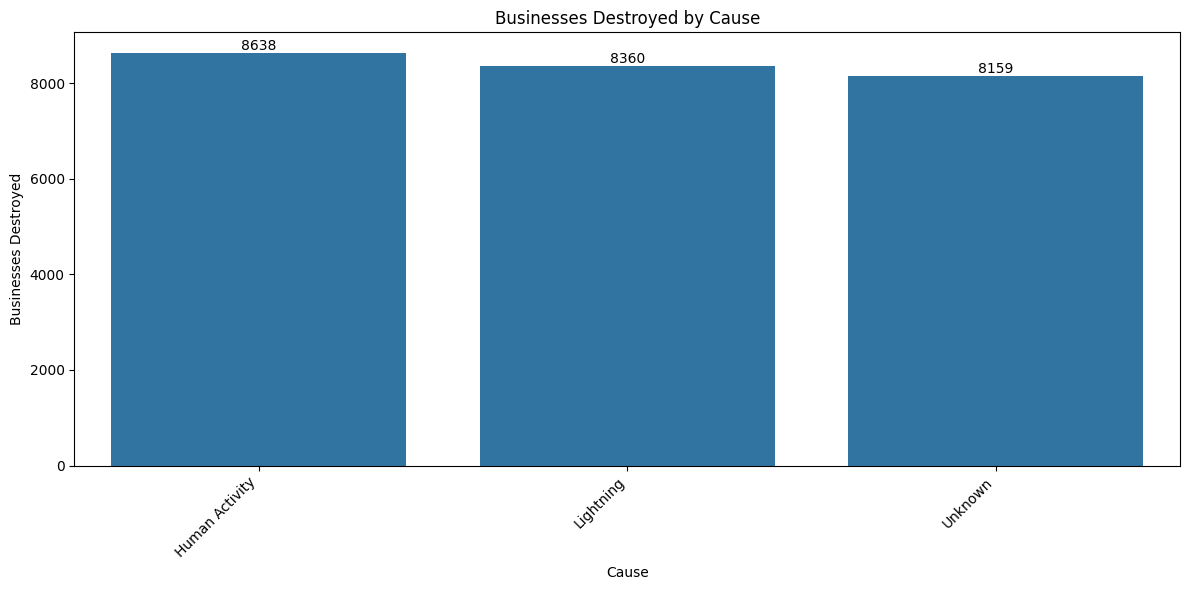

In [ ]:
# prompt: plot Businesses_Destroyed with Cause

import matplotlib.pyplot as plt
# Group data by Cause and sum Businesses_Destroyed
cause_destroyed = df.groupby('Cause')['Businesses_Destroyed'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=cause_destroyed.index, y=cause_destroyed.values)
plt.xlabel('Cause')
plt.ylabel('Businesses Destroyed')
plt.title('Businesses Destroyed by Cause')
plt.xticks(rotation=45, ha='right')

# Add the count above each bar
for bar, value in zip(bars.patches, cause_destroyed.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


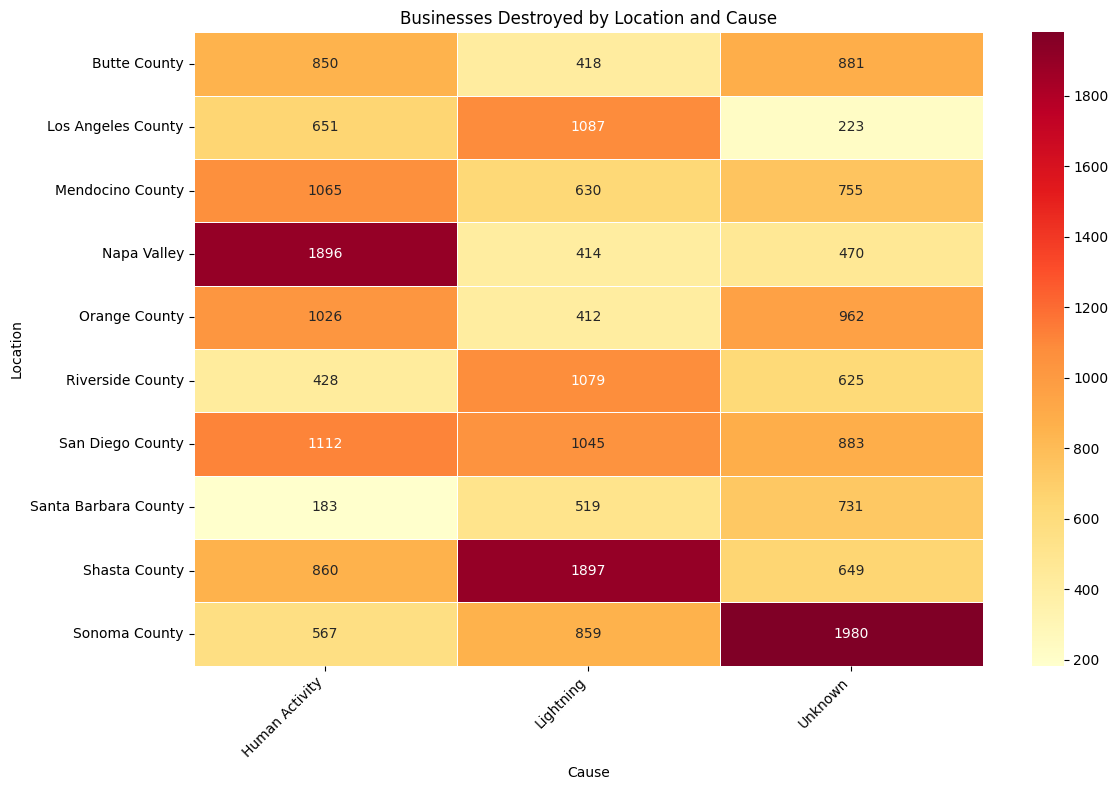

In [ ]:
# prompt: plot heat map Location with Cause in df values Businesses_Destroyed

# Create a pivot table to aggregate data for the heatmap
heatmap_data = df.pivot_table(index='Location', columns='Cause', values='Businesses_Destroyed', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Businesses Destroyed by Location and Cause")
plt.xlabel("Cause")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Group data by year and location, then sum the Businesses_Destroyed
grouped_data = df.groupby(['Year', 'Location'])['Businesses_Destroyed'].sum().reset_index()

# Create the interactive line chart using Plotly Express
fig = px.line(grouped_data,
             x='Year',
             y='Businesses_Destroyed',
             color='Location',
             title='Businesses Destroyed by Year and Location',
             labels={'Businesses_Destroyed':'Businesses Destroyed',
                     'Year': 'Year',
                     'Location': 'Location'},
             hover_data=['Location', 'Year', 'Businesses_Destroyed'])

fig.show()


In [ ]:
# Group data by year and location, then sum the Businesses_Destroyed
grouped_data = df.groupby(['Month', 'Location'])['Businesses_Destroyed'].sum().reset_index()

# Create the interactive line chart using Plotly Express
fig = px.line(grouped_data,
             x='Month',
             y='Businesses_Destroyed',
             color='Location',
             title='Businesses Destroyed by Month and Location',
             labels={'Businesses_Destroyed':'Businesses Destroyed',
                     'Month': 'Month',
                     'Location': 'Location'},
             hover_data=['Location', 'Month', 'Businesses_Destroyed'])

fig.show()


In [ ]:
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month,Day,Season
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,11,22,Fall
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021,9,23,Fall
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity,2022,2,10,Winter
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown,2021,5,17,Spring
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown,2021,9,22,Summer


In [ ]:
df.write_csv('df_california-wildfire-damage-2014-feb2025_cleaned.csv')

AttributeError: 'DataFrame' object has no attribute 'write_csv'

In [ ]:
# prompt: save df as csv

df.to_csv('df_california-wildfire-damage-2014-feb2025_cleaned.csv', index=False)
